## Analyse Exploratoire

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_FR_food= pd.read_csv('France_food_clean.csv')
df_FR_food.head()

,code,product_name,categories,energy_kcal_100g,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g,carbohydrates_100g,fat_100g,nutriscore_grade
0,5016,Pesto à La Roquette Bio Kazidomi,lipides,561.0,2318.0,9.6,0.5,1.3,8.2,2.70,1.080,23.0,40.0,38.0,4.0
1,7739110,Nut+,lipides,554.0,2318.0,18.7,36.6,3.9,13.1,0.00,0.000,20.0,40.0,38.0,4.0
2,3263850581212,Chips à l'ancienne,lipides,554.0,2318.0,3.4,0.7,4.7,5.0,1.32,0.528,10.0,40.0,38.0,4.0
3,3263853107815,Chips à l'ancienne extra fine,lipides,554.0,2318.0,3.4,0.7,4.7,5.0,1.30,0.520,10.0,40.0,38.0,4.0
4,3350031664892,"Chips - à l'ancienne, nature",lipides,554.0,2318.0,3.4,0.7,4.7,5.0,1.30,0.520,10.0,40.0,38.0,4.0


In [19]:
df_FR_food.shape

(23846, 15)

In [20]:
df_FR_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23846 entries, 0 to 23845
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     23846 non-null  int64  
 1   product_name             23846 non-null  object 
 2   categories               23846 non-null  object 
 3   energy_kcal_100g         23846 non-null  float64
 4   energy_100g              23846 non-null  float64
 5   saturated_fat_100g       23846 non-null  float64
 6   sugars_100g              23846 non-null  float64
 7   fiber_100g               23846 non-null  float64
 8   proteins_100g            23846 non-null  float64
 9   salt_100g                23846 non-null  float64
 10  sodium_100g              23846 non-null  float64
 11  nutrition_score_fr_100g  23846 non-null  float64
 12  carbohydrates_100g       23846 non-null  float64
 13  fat_100g                 23846 non-null  float64
 14  nutriscore_grade      

In [21]:
df_FR_food['categories'].unique()

array(['lipides', 'Protides', 'laitier', 'minéraux', 'vitamines'],
      dtype=object)

### Analyse univariées

In [21]:
df_FR_food.columns

Index(['code', 'product_name', 'categories', 'energy_kcal_100g', 'energy_100g',
       'saturated_fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition_score_fr_100g',
       'carbohydrates_100g', 'fat_100g', 'nutriscore_grade'],
      dtype='object')

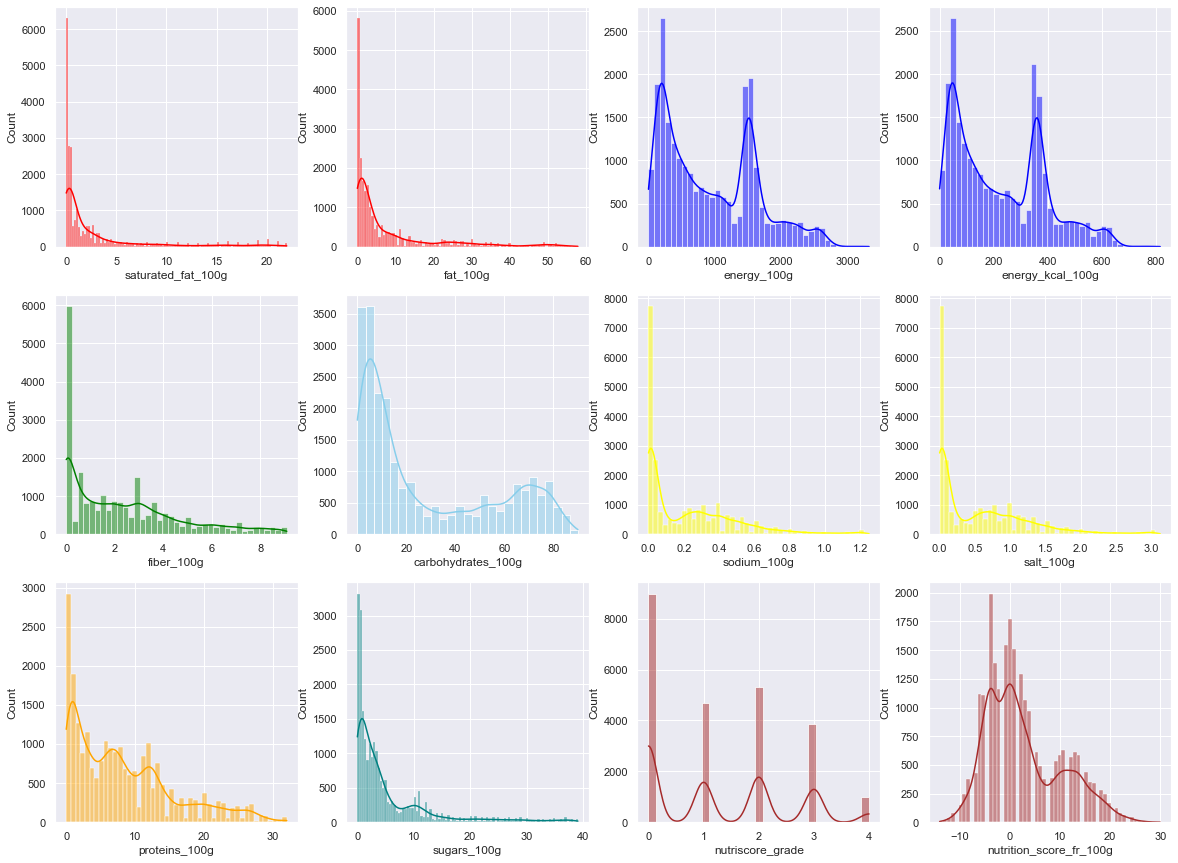

In [26]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 4, figsize=(20,15))

sns.histplot(data=df_FR_food, x="saturated_fat_100g", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=df_FR_food, x="fat_100g", kde=True, color="red", ax=axs[0, 1])

sns.histplot(data=df_FR_food, x="energy_100g", kde=True, color="blue", ax=axs[0, 2])
sns.histplot(data=df_FR_food, x="energy_kcal_100g", kde=True, color="blue", ax=axs[0, 3])

sns.histplot(data=df_FR_food, x="fiber_100g", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=df_FR_food, x="carbohydrates_100g", kde=True, color="skyblue", ax=axs[1, 1])

sns.histplot(data=df_FR_food, x="sodium_100g", kde=True, color="yellow", ax=axs[1, 2])
sns.histplot(data=df_FR_food, x="salt_100g", kde=True, color="yellow", ax=axs[1, 3])

sns.histplot(data=df_FR_food, x="proteins_100g", kde=True, color="orange", ax=axs[2, 0])
sns.histplot(data=df_FR_food, x="sugars_100g", kde=True, color="teal", ax=axs[2, 1])

sns.histplot(data=df_FR_food, x="nutriscore_grade", kde=True, color="brown", ax=axs[2, 2])
sns.histplot(data=df_FR_food, x="nutrition_score_fr_100g", kde=True, color="brown", ax=axs[2, 3])

plt.show()

<AxesSubplot:xlabel='categories', ylabel='count'>

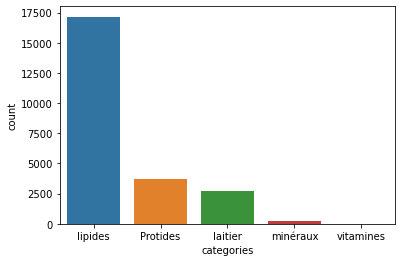

In [16]:
sns.countplot(x="categories", data=df_FR_food)

#### Les histogrammes de 'salt_100g' & 'sodium_100g' se ressemble donc nous n'en gardons qu'un seul.

#### la même chose pour 'energy_100g' et 'energy_kcal_100g' & 'fat_100g' et ' saturated_fat_100g'

In [3]:
df_FR_food_1=df_FR_food.drop(['energy_100g','salt_100g', 'fat_100g'], axis=1)

### Analyse bivariées

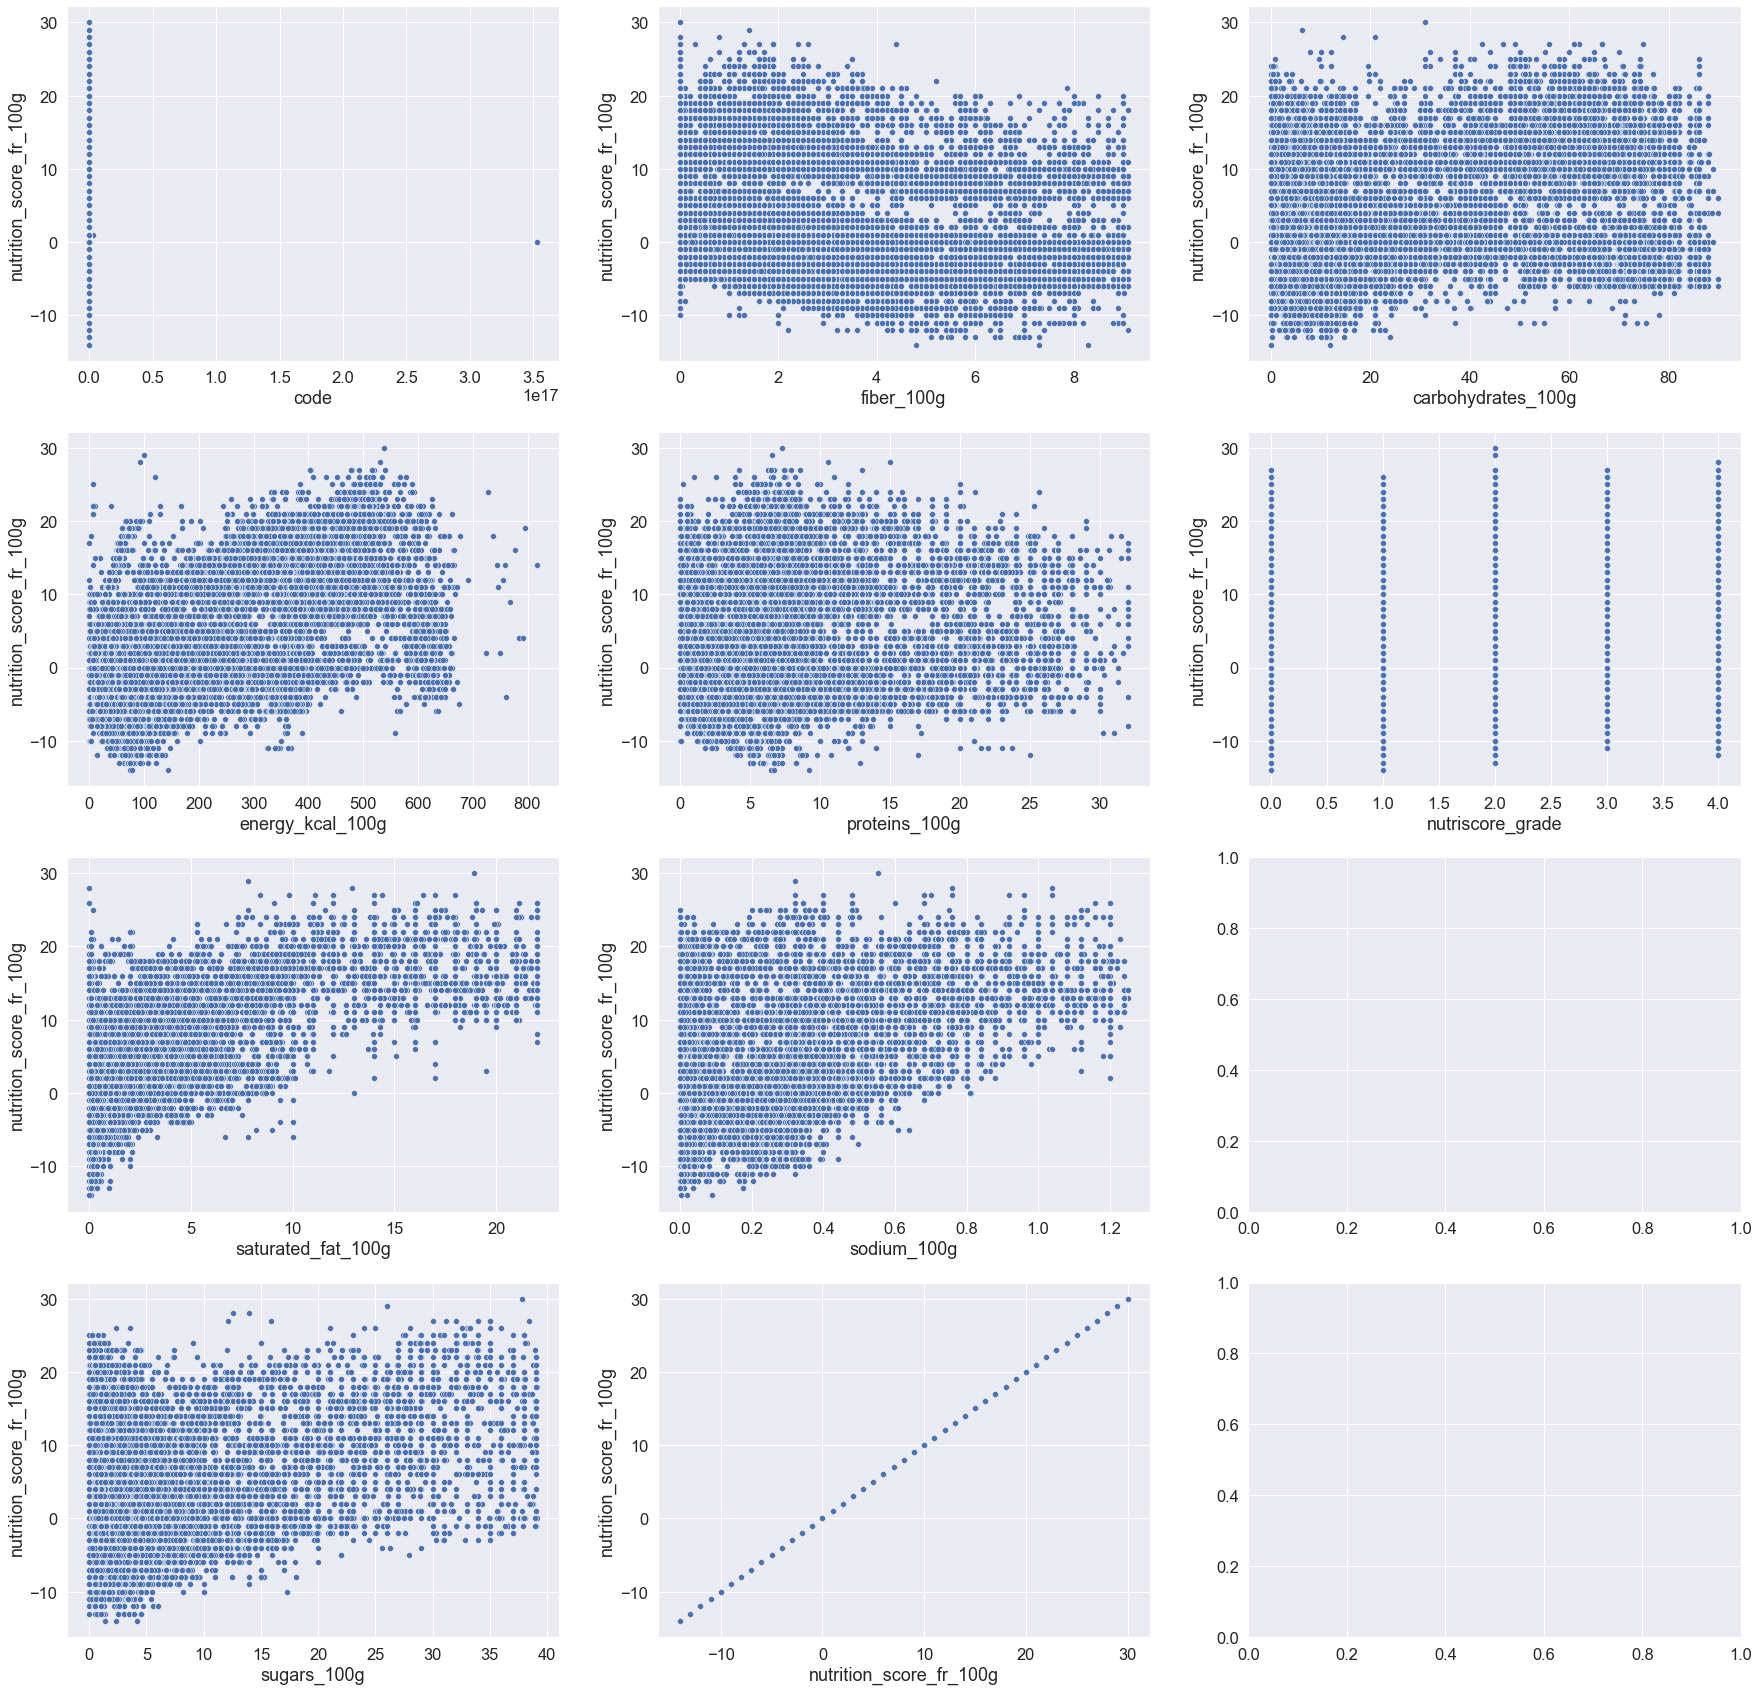

In [10]:
num_var = df_FR_food_1.dtypes[df_FR_food_1.dtypes.values != 'object'].index
f, axes = plt.subplots(4,3 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(num_var):
    sns.scatterplot(data=df_FR_food_1, x = feature, y= "nutrition_score_fr_100g",ax=axes[i%4, i//4])
sns.set(font_scale=1.5)

In [4]:
df_FR_food_1.columns

Index(['code', 'product_name', 'categories', 'energy_kcal_100g',
       'saturated_fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'nutrition_score_fr_100g', 'carbohydrates_100g',
       'nutriscore_grade'],
      dtype='object')

<AxesSubplot:xlabel='categories', ylabel='nutrition_score_fr_100g'>

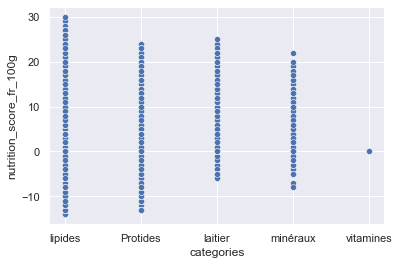

In [6]:
sns.scatterplot(data=df_FR_food_1, x = 'categories', y= "nutrition_score_fr_100g")

<AxesSubplot:xlabel='energy_kcal_100g', ylabel='nutrition_score_fr_100g'>

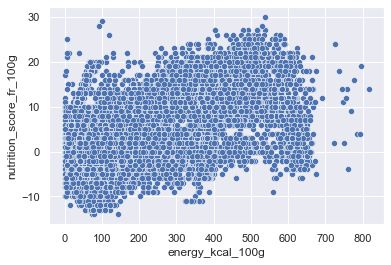

In [8]:
sns.scatterplot(data=df_FR_food_1, x = 'energy_kcal_100g', y= "nutrition_score_fr_100g")

In [ ]:
sns.pairplot(df_FR_food_1)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001CBF0E30670> (for post_execute):


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



<AxesSubplot:xlabel='additives_n', ylabel='nutrition_score_fr_100g'>

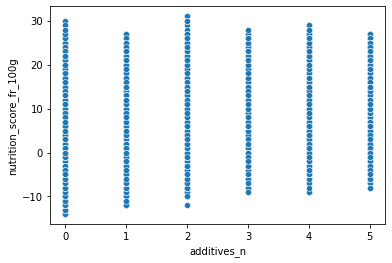

In [5]:
sns.scatterplot(data=df_FR_food_1, x = 'additives_n', y= "nutrition_score_fr_100g")

### Analyse multivariable

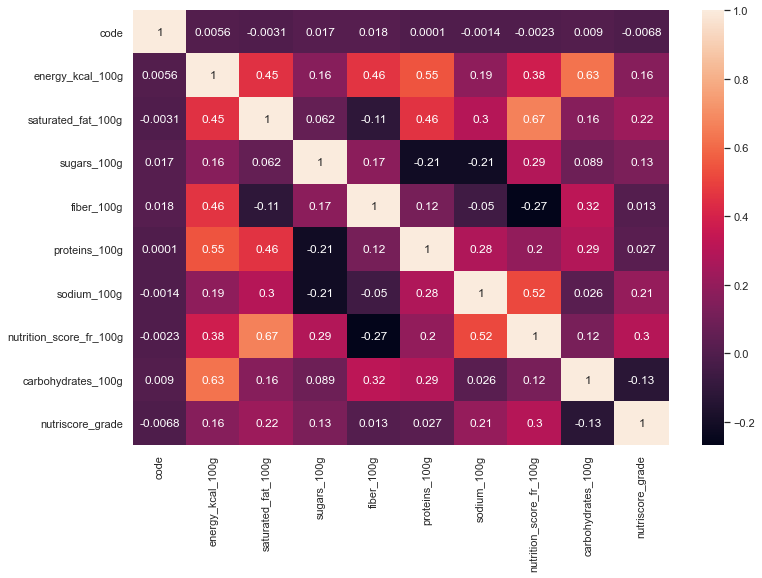

In [5]:
sns.set(font_scale=1.0)
plt.figure(figsize=(12, 8))

df_corr = df_FR_food_1.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);